Civitai에서 모델 다운로드하기

In [1]:
import os

import requests
from tqdm import tqdm

In [2]:
url = "https://civitai.com/models/65203/disney-pixar-cartoon-type-a"

model_id = url.replace("https://civitai.com/models/", "").split("/")[0]
print(model_id)

65203


In [3]:
response = requests.get(f"https://civitai.com/api/v1/models/{model_id}")
response.json()

{'id': 65203,
 'name': 'Disney Pixar Cartoon Type A',
 'description': '<p>There\'s no good pixar disney looking cartoon model yet so i decided to make one. This is a merge of <a target="_blank" rel="ugc" href="https://civitai.com/models/15773/pixar-style-model">Pixar Style Model</a> with my own Loras to create a generic 3d looking western cartoon. In the examples I Use hires. fix, upscale latent, denoising 0.5, hires steps 20, upscale by 2 . Clip skip 2 . I will upload more variants of this in the future</p><p></p><p>You need to use VAE or the color become pale and gray</p><p></p><p><span style="color:rgb(193, 194, 197)">if you like the models, please consider supporting me on, i will continue to upload more cool stuffs in the future</span></p><p><br /><a target="_blank" rel="ugc" href="https://www.patreon.com/PromptSharingSamaritan">https://www.patreon.com/PromptSharingSamaritan</a></p><p><a target="_blank" rel="ugc" href="http://patreon.com/PromptSharingSamaritan￼"><br /></a><a targe

In [4]:
download_url = response.json()["modelVersions"][0]["downloadUrl"]
filename = response.json()["modelVersions"][0]["files"][0]["name"]
print("download_url:", download_url)
print("filename:", filename)

download_url: https://civitai.com/api/download/models/69832
filename: disneyPixarCartoon_v10.safetensors


In [5]:
def download_from_url(url: str, file_path: str, chunk_size=1024):
    resp = requests.get(url, stream=True)
    total = int(resp.headers.get('content-length', 0))
    with open(file_path, 'wb') as file, tqdm(
        desc=file_path,
        total=total,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in resp.iter_content(chunk_size=chunk_size):
            size = file.write(data)
            bar.update(size)

In [6]:
file_path = f"models/{filename}"
os.makedirs("models", exist_ok=True)
print(f"[INFO] Download start!")
download_from_url(download_url, file_path)
print(f"\n[INFO] File downloaded: {file_path}")

[INFO] Download start!


models/disneyPixarCartoon_v10.safetensors: 100%|██████████| 3.95G/3.95G [00:39<00:00, 107MiB/s] 


[INFO] File downloaded: models/disneyPixarCartoon_v10.safetensors


다운로드한 모델로 이미지 생성

In [7]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from diffusers.utils import make_image_grid
from PIL import Image

/home/haiqv/conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
pipeline = StableDiffusionImg2ImgPipeline.from_single_file(
        "models/disneyPixarCartoon_v10.safetensors",
        torch_dtype=torch.float16,
        use_safetensors=True,
).to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
Loading pipeline components...: 100%|██████████| 6/6 [01:01<00:00, 10.23s/it]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [9]:
input_image = Image.open("examples/kitty.png")

prompt = (
    "kitty in the city, cartoon style, drawing, detailed"
)
negative_prompt = "ugly, blurry, bad anatomy, bad art, wierd colors"

output_images = pipeline(
    image=input_image,
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=4,
    num_inference_steps=30,
    strength=0.7,
).images

/home/haiqv/conda/envs/py310/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:768: FutureWarning: You have passed 4 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)
100%|██████████| 21/21 [00:01<00:00, 13.30it/s]


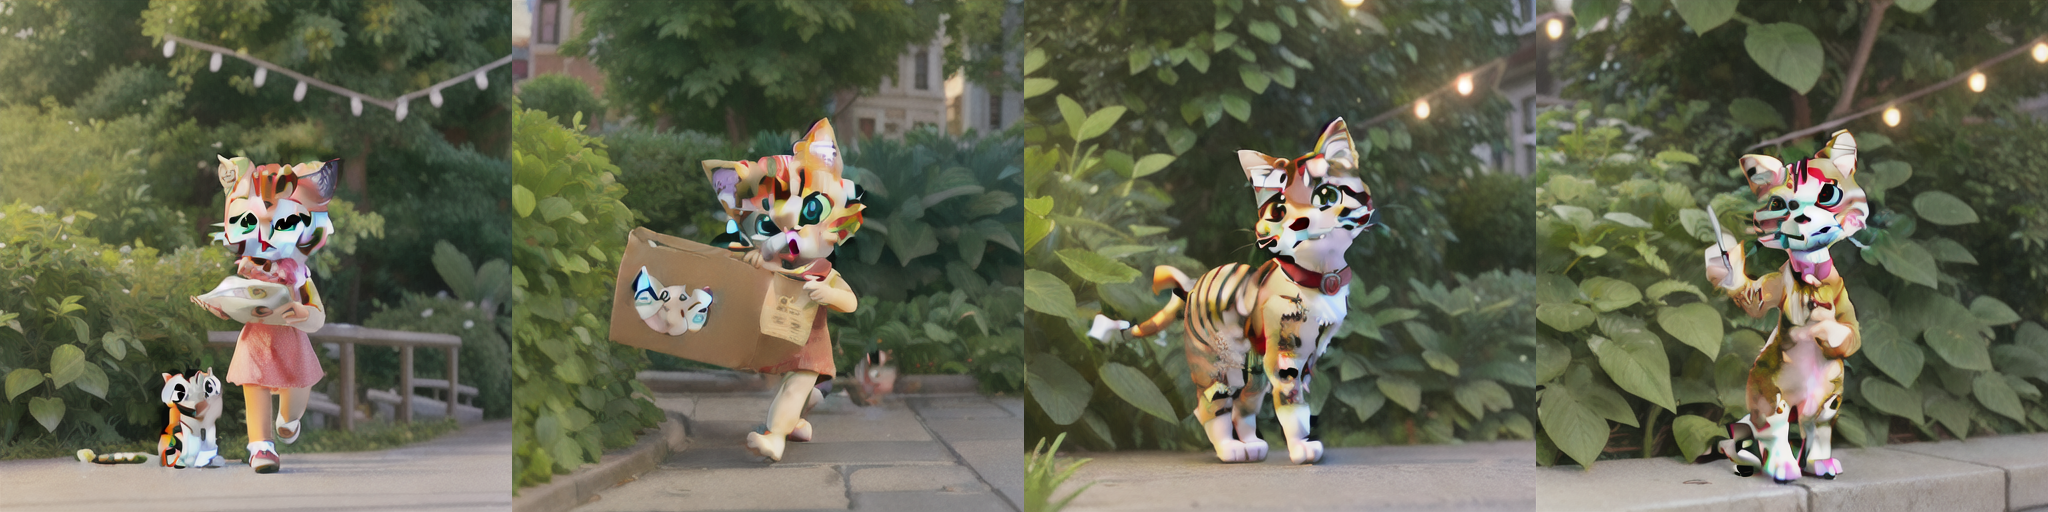

In [10]:
make_image_grid(output_images, rows=1, cols=4)